# DATASCI W261: Machine Learning at Scale

**Angela Gunn &  Jing Xu **  
**angela@egunn.com **  
**jaling@gmail.com **  

**MIDS - W261 - Section 3**  
**February 24, 2016**  
**Assignment : Week 6**


----
## HW6.0. 
In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.



**Mathematical Optimization**  
In mathematics, computer science and economics, mathematical optimization is the selection of a best element with regard to some criteria from some set of available alternatives. An optimization problem consists of maximizing or minimizing an objective function by choosing input values from an allowed set and computing the value of the function.  

**Railway**
Railways operate by sharing track and cars. Often it is the case that a customer's shipment must go by multiple carriers to reach its destination. Negotiations then must happen to determine what part of the fees each railway will collect.  There is a central service that coordinates this, but it is up to each railway to approve/dispute the split. Most railways have systems that automatically approve/dispute based on different criteria, or sends it to an adjudicator if it cannot be decided.  I was tasked to determine if the current criteria was optimal - in this case it meant haveing the least amount of loss, but also ensuring that the work sent to adjudicators is minimized (less human intervention). This was a matter of deciding thresholds for each attribute.  For example, if the railway thinks it should get $x for the shipment, but the notice says it should get less, how much less is "tolerable" before sending it to an adjudicator?  Some notices suggest we should get more than what we think we should. In that case, it is easy to say the error in our favor is acceptable, but in good faith we should still dispute it.  So it is a balance of different situations to end up with a positive balance, adjusting the acceptable thresholds (inputs) so to maximize profits, minimize expenses, and be in good faith with all carriers.

----
## HW6.1 
**Optimization theory: **  
**For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function **  
> **x^3 -12x^2-6**   

**defined over the real  domain -6 to +6. **  

**Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.**  

###Response:
For univariate optimization problem  with  no  constraints with $f(x)$ as objective function, at a point x\* in the domain of *f* where a minimum occurs, the following are true

- **First Order Condition:** For a point to be maximum or minimum, necessary condition is to have a zero value for the gradient function (first derivative) at the point. $$ \frac{\partial f(x*)}{\partial x} = 0 $$

- **Second Order Condition:** If a point has a value of 0 at the first derivative, and a negative value at the second derivative function, then it is a local maximum. or if a positive value at the second derivative function, then it is a local minimum. 
    
    If x\* is a local maximum, $$ \frac{\partial f^2(x*)}{\partial x^2} < 0 $$
    If x\* is a local minimum, $$ \frac{\partial f^2(x*)}{\partial x^2} > 0 $$
    
For the given univariate objective function $f(x)$, following are the firt order and second order derivative functions <br>

**Objective function:** $ f(x) = x^3 − 12x^2 − 6 $ <br>
**First Order:** $ f′(x) = 3x^2 − 24x $ <br>
**Second Order:** $ f″(x) = 6x − 24 $ <br>

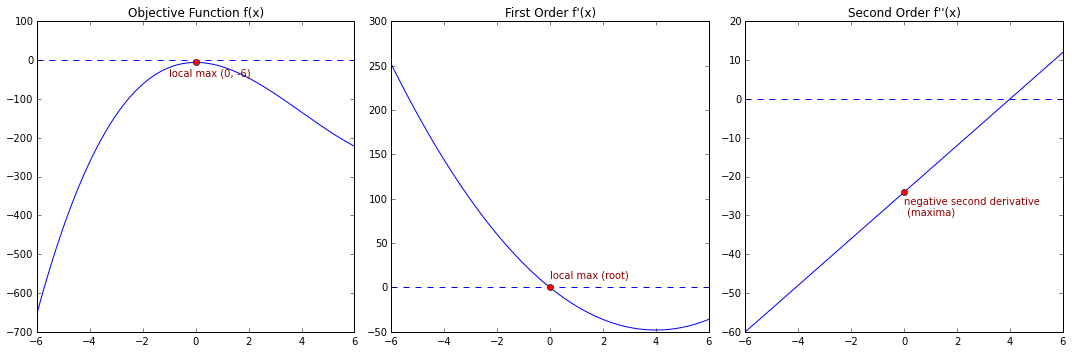

In [1]:
# making matplotlib plots inline
%matplotlib inline

import numpy as np  
import matplotlib.pyplot as plt 

plt.figure(figsize=(15, 5))

# objective function
ax = plt.subplot(131)
X = np.linspace(-6, 6, 100)
y = [(x**3 - 12*x**2 - 6) for x in X]
line = plt.plot(X, y)
ax.set_title("Objective Function f(x)")
# annotation
plt.axhline(y=0.,  ls='dashed')
plt.annotate(
    'local max (0, -6)', 
    xy = (0, -6), 
    xytext = (-1, -40),
    color = "darkred"
)
plt.plot(0,-6,'o',color='r')

# first order derivative
ax = plt.subplot(132)
y = [(3*x**2 - 24*x) for x in X]
line = plt.plot(X, y)
ax.set_title("First Order f'(x)")
plt.axhline(y=0.,  ls='dashed')
plt.plot(0,0,'o',color='r')
plt.annotate(
    'local max (root)', 
    xy = (0, -6), 
    xytext = (0, 10), 
    color = "darkred"
)

# second order derivative
ax = plt.subplot(133)
y = [(6*x - 24) for x in X]
line = plt.plot(X, y)
ax.set_title("Second Order f''(x)")
plt.axhline(y=0., ls='dashed')
plt.plot(0,-24,'o',color='r')
plt.annotate(
    'negative second derivative\n (maxima)', 
    xy = (0, -24), 
    xytext = (0, -30), 
    color = "darkred"
)

plt.tight_layout()
plt.show()

From the graphs, it appears we have local maximum at (x, y) = (0, -6)

- Necessary condition for FOC for optimality suggests minimum/maxiumum point when $f'(x=x∗) = 0$. As per the plot, f′(x) = 0 at x = 0 (i.e. root). 

- Sufficient condition SOC declares candidate point x\* as optimal 
    - Maximum when $f''(x = x∗) < 0 $
    - Minimum when $f''(x = x∗) > 0 $ 
  
  In the second order plot, $ f''(0) < 0 $ confirming a local maximum at x = 0.

-----
## HW6.2
Taking x=1 as the first approximation(xt1) of a root of X^3 + 2x -4 = 0, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)


### Just some notes to remind me what I am trying to do:
In Newton-Raphson method, gradient function is approximated by tangent slope at an arbitrary point (here starting with x = 1).

$$ f(x) = x^3 + 2x -4 $$
$$ f'(x) = 3x^2 + 2 $$

Pluggin $x = 1$ into objective function 

$$ f(x) = x^3 + 2x -4 $$
$$ f(1) = 1^3 + 2 -4 = -1 $$

Calculating tangent slope

$$ f'(x) = 3x^2 + 2 $$
$$ f'(1) = 3 + 2 = 5 $$

Plugging in the point and slope into a linear equation (second order derivative)

$$ y = mx + b $$
$$ -1 = 5*1 + b $$
$$ b = -6 $$

Solve for $y = 0$ to get x
$$ 0 = 5x - 6 $$
$$ x = 1.2 $$

Putting this into python code below
$$ x_{t2} = x_{t1} - \frac{f(x_{t1})}{f'(x_{t1}) } $$

In [2]:
def f(x):
    #the function
    return x**3+2*x-4

def f1(x):
    #the derivative of the function
    return 3*x**2+2

def newton_raphson(f, f1, x0, max_iter = 1000):
    #f is the function, f1 is the derivative, x0 is the 
    x_t1 = x0
    THRESHOLD = 0.001 

    while True:  #this will continue until we return somethig; either because we reach threshold or reach max iterations
        x = x_t1 - 1.0*f(x_t1)/f1(x_t1)
        max_iter -= 1
        if abs(x - x_t1) < THRESHOLD or max_iter <= 0:
            return x
        else:
            x_t1 = x

#per assignment question, only iterating for 1 round.
print newton_raphson(f, f1, 1.0,1)
    
    

1.2


----
## HW6.3 Convex optimization 
**What makes an optimization problem convex? What are the first order Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?**

The optimization function $min_{x} f(x)$ is called a **convex optimization problem** if:
+ The objective function $f$ is convex
+ The functions defining the inequality constraints $f_{i}$ are convex
+ The functions defining the equality constraints $f_{i}$ are affine


**First Order Condition:** The necessary condition for optimality for a given x\* is a global minimum of $f(x)$ if $f'(x) = 0$ i.e. funtion is globally above the tangent at y


<img src=convex3.png>


**Second Order Condition:** The second order optimality conditions are not neessary. The first order condition is sufficient to confirm the global minimum is not a local minimum. This is convenient to machine learning because there is no need to test the second order equation to confirm global minimum after gradient descent. 
For convex optimization problems, only first order condition is needed for optimization.


**Fill in the BLANKS here:**
> **Convex minimization, a subfield of optimization, studies the problem of minimizing <span style="color:firebrick">convex</span> functions over <span style="color:firebrick">convex</span> sets. The <span style="color:firebrick">convexity</span> property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.**

----
##HW 6.4
The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:


$$ 0.5 * \sum\limits_{i} weight_i * (WX_i - y_i)^2 $$

Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.



Let cost function $J(W)$ be defined as

$$ J(W) = 0.5 * \sum\limits_{i} w_i (WX_i - y_i)^2 $$

Expanding cost function
$$ J(W) = 0.5 * \sum\limits_{i} w_i (W^2X_i^2 + y_i^2 - 2WX_iy_i) $$

Calculating gradient descent
$$ \frac{\partial J(W)}{\partial W} = 0.5 * \sum\limits_{i} w_i (2WX_i^2 - 2X_iy_i) $$

Rearranging terms <br>
$$ \frac{\partial J(W)}{\partial W} = \sum\limits_{i} w_iX_i(WX_i - y_i) $$ 

where $ (WX_i - y_i) $ is error term and $ w_iX_i $ is weighted input i and combined gives the weighted error

----
##HW 6.5
Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 

> weight(x)= abs(1/x)

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
weight = abs(1/x)
data = zip(y,x,weight)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

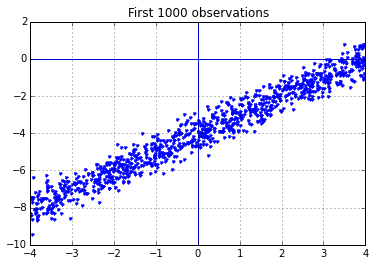

In [4]:
#Plot the data:
plt.plot(x[:1000], y[:1000],'.')
plt.grid(True)
plt.axhline(0)
plt.axvline(0)
plt.title('First 1000 observations')
plt.show()

### Implement MRJob

In [5]:
%%writefile MrJobBatchGDUpdate_LinearRegression.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class MrJobBatchGDUpdate_LinearRegression(MRJob):
    
    def initializeWeights(self):
        # run before the mapper processes any input
        # Read in weights
        with open('weights.txt','r') as f:
            self.weights = [float(x) for x in f.readline().split(',')]
        
        # Initialize gradient for this iteration
        self.partialGradient = [0]*len(self.weights)
        self.partialCount = 0
    
    def calculatePartialGradient(self, _, line):
        # multiply by weight in WOLS
        # keep partial sums in memory
        
        # D is one observation of our data
        # The observations are in the form (y, x, weight)
        D = (map(float, line.split(',')))
        y = D[0]
        x = D[1]
        weight = D[2]
        
        # yHat is the predicted value given current weights
        yHat = self.weights[0] + self.weights[1] * x
        
        # Update partial gradient with gradient from D
        self.partialGradient = [self.partialGradient[0] + (y - yHat) * weight,
                                self.partialGradient[1] + (y - yHat) * x * weight]
        self.partialCount += 1

    def emitPartialGradient(self):
        yield None, (self.partialGradient, self.partialCount)

    def gradient_accumulater(self, _, partialGradientRecords):
        # Accumulate partial gradient from mapper and emit total gradient 
        # Output: key = None, Value = gradient vector
        # Initialize totals
        totalGradient = [0]*2
        totalCount = 0

        # Accumulate
        for partialGradient, partialCount in partialGradientRecords:
            totalCount += partialCount
            for i in range(len(totalGradient)):
                totalGradient[i] += partialGradient[i]
        
        # Emit total gradient
        yield None, [x / totalCount for x in totalGradient]
        

    def steps(self):
        return [
                MRStep(mapper_init=self.initializeWeights,
                       mapper=self.calculatePartialGradient,
                       mapper_final=self.emitPartialGradient,
                       reducer=self.gradient_accumulater)
            ]
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Overwriting MrJobBatchGDUpdate_LinearRegression.py


###Driver/Execute

In [6]:
from numpy import random,array
from MrJobBatchGDUpdate_LinearRegression import MrJobBatchGDUpdate_LinearRegression

learning_rate = 0.05
stop_criteria = 0.000005

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LinearRegression(args=['LinearRegression.csv', '--file', 'weights.txt', '--no-strict-protocol'])

# Update centroids iteratively
i = 0
All_COEF = []
while(1):
    print "iteration ="+str(i)+"  weights [Intercept Slope] =",weights
    if i%10 == 0: All_COEF.append(weights)
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
print "Final weights:\n"
print "Intercept: ", weights[0]
print "Slope: ", weights[1]



iteration =0  weights [Intercept Slope] = [-2.99123098 -1.27831131]
iteration =1  weights [Intercept Slope] = [-3.19510958 -1.05045922]
iteration =2  weights [Intercept Slope] = [-3.35579201 -0.84538786]
iteration =3  weights [Intercept Slope] = [-3.48243187 -0.66082098]
iteration =4  weights [Intercept Slope] = [-3.58224287 -0.49470947]
iteration =5  weights [Intercept Slope] = [-3.66090999 -0.34520878]
iteration =6  weights [Intercept Slope] = [-3.72291345 -0.21065853]
iteration =7  weights [Intercept Slope] = [-3.77178403 -0.08956417]
iteration =8  weights [Intercept Slope] = [-3.81030429  0.01941957]
iteration =9  weights [Intercept Slope] = [-3.84066714  0.11750354]
iteration =10  weights [Intercept Slope] = [-3.8646008   0.20577759]
iteration =11  weights [Intercept Slope] = [-3.88346729  0.28522267]
iteration =12  weights [Intercept Slope] = [-3.89833999  0.35672167]
iteration =13  weights [Intercept Slope] = [-3.91006488  0.42106923]
iteration =14  weights [Intercept Slope] = [

###A graph to show the how the iterations progressed

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


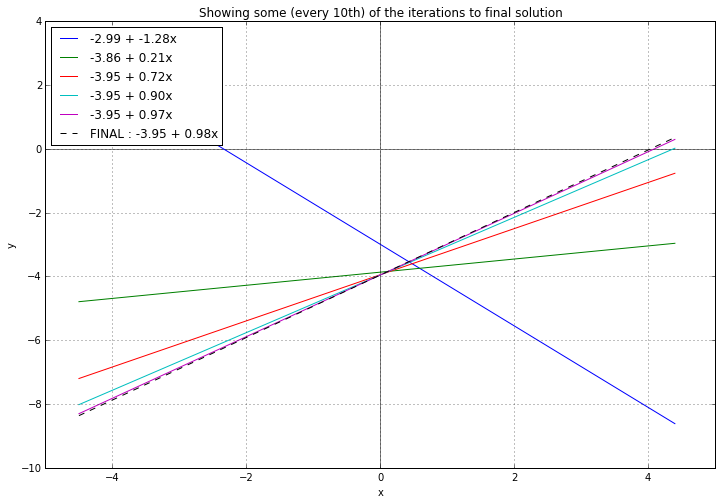

In [7]:
colors = ['b','g','r','c','m','y']

plt.figure(figsize=(12,8))
plt.grid(True)
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')


x_values = np.arange(-4.5,4.5,0.1)

cnt = 0
for i, s in All_COEF:
    f = i + s*x_values
    slabel = "{:.2f} + {:.2f}x".format(i,s)
    plt.plot(x_values, f, color = colors[cnt],label=slabel)
    cnt +=1

i,s =  weights
f = i + s*x_values
slabel = "FINAL : {:.2f} + {:.2f}x".format(i,s)
plt.plot(x_values, f, color = "black",  ls='dashed', label=slabel)

    
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.title('Showing some (every 10th) of the iterations to final solution')

plt.show()


Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using SciKit-Learn ()

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

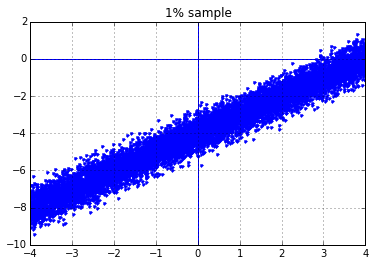

In [8]:
# sample 1% of data
i = np.random.choice(np.arange(1000000), 10000, replace=False)
x_sample = x[i].reshape((10000,1))
y_sample = y[i].reshape((10000,1))
w_sample = weight[i].reshape((10000,1)) #weights
plt.plot(x_sample, y_sample,'.')
plt.grid(True)
plt.axhline(0)
plt.axvline(0)
plt.title('1% sample')
plt.show()


###Using sklearn to do the Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

#Fit the data:
lr = LinearRegression()
lr.fit(x_sample, y_sample, w_sample)


print "Intercept: {}".format(lr.intercept_[0])
print "Slope: {}".format(lr.coef_[0][0])

Intercept: -4.0016628724
Slope: 1.00216981161


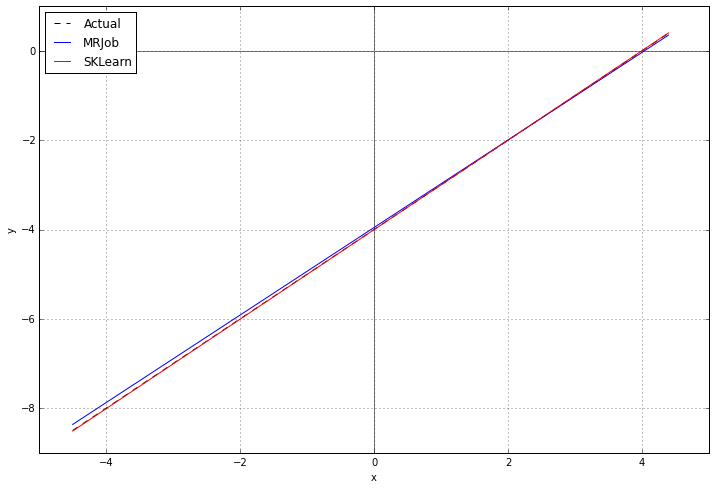

In [10]:
#collect values for plotting
x_values = np.arange(-4.5,4.5,0.1)
y_true = -4 + x_values  # the true values
y_mrjob = weights[0] + weights[1] * x_values  #from our MRJob run
y_sklearn = lr.intercept_[0] + lr.coef_[0][0] * x_values #from sklearn

plt.figure(figsize=(12,8))
plt.grid(True)
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

trueFunction = plt.plot(x_values, y_true, color='black', ls='dashed', label='Actual')
MRJobFunction = plt.plot(x_values, y_mrjob, color='blue', label='MRJob')
SKLearnFunction = plt.plot(x_values, y_sklearn, color='red', label='SKLearn')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

####<font color="red">OBSERVATIONS</font>
You can only barely make out the "Actual" line, and only because it is shown as a dash.
The SKLearn did a better job of matching it.
The MRJob implementation is fairly close, but as |x| grows, the error will become larger.

----
##HW6.5.1 (Optional)
Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space.  (Plot them side by side if possible)
Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.
Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.

---
##HW6.6 Clean up notebook for GMM via EM

Using the following notebook as a starting point:

http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

Improve this notebook as follows:
-- Add in equations into the notebook (not images of equations) 
-- Number the equations
-- Make sure the equation notation matches the code and the code and comments refer to the equations numbers
-- Comment the code
-- Rename/Reorganize the code to make it more readable
-- Rerun the examples similar graphics (or possibly better graphics)

###<font color="red">Link to new version:</font>
https://github.com/anggunn/W261/blob/master/Week06/MIDS-W261-2016-HWK-Week06-GMM-Gunn-Xu.ipynb

----
##HW6.7 Implement Bernoulli Mixture Model via EM
Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

**As a unit test:** use the dataset in the following slides:

https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Dont forget the smoothing.

**As a test:** use the same dataset from HW 4.5, the Tweet Dataset. 
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using K = 4.  Repeat this experiment using your KMeans MRJob implementation fron HW4.  
Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

Here is some more information on the Tweet Dataset.

Here you will use a different dataset consisting of word-frequency distributions for 1,000 Twitter users. These Twitter users use language in very different ways, and were classified by hand according to the criteria:

> 0: Human, where only basic human-human communication is observed.
> 
> 1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).

> 2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).

> 3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,
which spawned this dataset:

> http://arxiv.org/abs/1505.04342
> http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:

> topUsers_Apr-Jul_2014_1000-words.txt

and are of the form:

> USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.

where

> USERID = unique user identifier
> CODE = 0/1/2/3 class code
> TOTAL = sum of the word counts

Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.

###<font color="red">NOTES ON IMPLEMENTATION</font>

We were unable to match the text book table; Document 6 was misclassified, and the numbers did not change as shown in the table.
The issue is likely in how the logs are applied. We were unable to correct this issue.

The work done on the large dataset was executed locally. It took just over an hour to complete. Specifying more mappers/reducers would have made the solution run more efficiently.

At the hour we complete this, it is not feasible to take this any further.

In [32]:
# unit test data and converting unit test data into the same format as the full dataset

unit_test = ['hot chocolate cocoa beans',
             'cocoa ghana africa',
             'beans harvest ghana',
             'cocoa butter',
             'butter truffles',
             'sweet chocolate',
             'sweet sugar',
             'sugar cane brazil',
             'sweet sugar beet',
             'sweet cake icing',
             'cake black forest']



# unique words
vocabs = set()
for doc in unit_test:
    for word in doc.split(' '): vocabs.add(word)
        
print str(vocabs)

# convert to the format of USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
writer = open('unit_test.txt', 'w')
for i, doc in enumerate(unit_test):
    words = doc.split(' ')
    # set all codes to 0, since we don't really have that data
    writer.write(str(i+1) + ',0,' + str(len(words)))
    for voc in vocabs:
        # counts for each unique words
        writer.write(',' + str(words.count(voc)))
    writer.write('\n')
writer.close()

set(['ghana', 'butter', 'cane', 'icing', 'truffles', 'sweet', 'brazil', 'africa', 'chocolate', 'cocoa', 'hot', 'beans', 'forest', 'cake', 'beet', 'sugar', 'harvest', 'black'])


In [33]:
!cat unit_test.txt

1,0,4,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0
2,0,3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
7,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
9,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
10,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
11,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1


###Initialization Method

In [5]:
%%writefile BEM_Initialization.py
import random

# initialize Bernoulli model for EM
# k: number of clusters
# data_file: file containing data in the specific format 
# USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
# write to cluster_assignments.txt, 
def InitializeBEM(k, data_file, test_ind = False):
    writer = open('cluster_assignments.txt', 'w')

    if not test_ind:
        for line in open(data_file, 'r'):
            doc_id = line.strip().split(',')[0]

            # uniform random assignment for each cluster
            r_nk_r = [random.random() for i in range(k)]
            # normalize the assignment
            r_nk = map(lambda x: str(x/sum(r_nk_r)), r_nk_r) #take random values and divide by sum of the randoms generated
            writer.write(doc_id + ',' + ','.join(r_nk) + '\n')
    else:
        line_no = 0
        for line in open(data_file,'r'):
            doc_id = line.strip().split(',')[0]
            if doc_id.strip() =="6":
                writer.write(doc_id + ",1.00,0.00\n")
            elif doc_id.strip() =="7":
                writer.write(doc_id + ",0.00,1.00\n")
            else:
                writer.write(doc_id + ",0.50,0.50\n")
                
            
                    
    writer.close()

Overwriting BEM_Initialization.py


In [6]:
#Showing it works
from BEM_Initialization import InitializeBEM

InitializeBEM(2, 'unit_test.txt', True)
!cat cluster_assignments.txt
InitializeBEM(2, 'unit_test.txt', False)
!cat cluster_assignments.txt

1,0.50,0.50
2,0.50,0.50
3,0.50,0.50
4,0.50,0.50
5,0.50,0.50
6,1.00,0.00
7,0.00,1.00
8,0.50,0.50
9,0.50,0.50
10,0.50,0.50
11,0.50,0.50
1,0.423756944228,0.576243055772
2,0.425171922059,0.574828077941
3,0.468548895307,0.531451104693
4,0.417104031703,0.582895968297
5,0.617529282699,0.382470717301
6,0.426068025785,0.573931974215
7,0.536817345396,0.463182654604
8,0.334923669253,0.665076330747
9,0.565851216804,0.434148783196
10,0.954081426636,0.0459185733635
11,0.833215016491,0.166784983509


###Code for implementing Bernoulli Mixture Model

In [3]:
%%writefile BEM_Iterate.py

# EM iteration implementation for the Bernoulli Mixture Model
from mrjob.job import MRJob

from mrjob.step import MRStep

class BEM(MRJob):
    
    
    
    def steps(self):
        return [
            MRStep(mapper_init=self.mapper_init_setK, 
                   mapper=self.mapper_maximization, 
                   reducer_init=self.reducer_init_soft_assignments, 
                   reducer=self.max_reducer),
            MRStep(reducer_init=self.reducer_init_load_apriori, 
                   reducer=self.exp_reducer)
        ]
    
    
    def mapper_init_setK(self):
        #set k (number of clusters) by looking at the first row of the initialization file
        #probably a better way to do this
        for line in open('cluster_assignments.txt', 'r'):
            self.k = len(line.strip().split(',')[1:])
            break
    
    # mapper for the maximization step
    def mapper_maximization(self, _, line):
        # data_file: file containing data in the specific format 
        # ID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
        lineArr = line.strip().split(',')
        docId = lineArr[0]   #ID
        known_clusterId = lineArr[1]  #CODE
        
        for term_idx, word_count in enumerate(lineArr[3:]):
            # binarize word counts for bernoulli to work
            occurence = 0
            if int(word_count) > 0: occurence = 1
                
            for k in range(self.k):
                #emit the same data twice, first to calculate qmk, and second to pass along to calculate rnk
                #this way we don't need to store co-occurence vectors in memroy in reducer
                #secondary sort is required so that qmk is calculated first
                """POSSIBLE CHANGE TO PUT 0/1 INTO KEY"""
                yield (term_idx, k), (0, docId, occurence)
                yield (term_idx, k), (1, docId, occurence)
    
    # loading up soft cluster assignments
    def reducer_init_soft_assignments(self):
        
        self.r_nk = {}  # soft cluster assignments
        self.alpha_k = None  # a priori for each cluster
        self.total_docs = 0  # total documents (N)
        #(M-Step)
        for line in open('cluster_assignments.txt', 'r'):
            #each line is ID, k1_prior, kw_prior, ...
            self.total_docs += 1
            lineArr = line.strip().split(',')
            #print line
            
            doc_id = lineArr[0]  #ID
            assignments = map(float, lineArr[1:])  #soft assignments
            self.r_nk[doc_id] = assignments
            
            # accumulate alpha_k: cluster a priori
            if self.alpha_k == None: self.alpha_k = [0]*len(assignments)
            for i, assign in enumerate(assignments):
                self.alpha_k[i] += float(assign)
                
        # normalize alpha_k (the a priori for each cluster)
        self.alpha_k = map(lambda x: x/self.total_docs, self.alpha_k) 
        
    # reducer for the maximization step
    def max_reducer(self, term_cluster_id, term_occurences):
        termId, clusterId = term_cluster_id
        top_q_mk = [0.0]*len(self.alpha_k)
        q_normalized = False
        r_nk_sum = [0.0]*len(self.alpha_k)
        #print '--------' + str(term_cluster_id) + '------------'
        for term_occurence_data in term_occurences:
            flag, docId, occurence = term_occurence_data
            #print str(term_occurence_data)
            if flag == 0:
                # calculate q_mk  (M-Step)
                for k in range(len(self.alpha_k)):
                    # soft assignment for this doc for this clusterID
                    r_nk = self.r_nk[docId][k] ####+ 0.0001 # smoothing
                    r_nk_sum[k] += r_nk
                    top_q_mk[k] += r_nk*occurence
                
            else:
                if q_normalized == False:
                    # normalize term prob for each cluster
                    q_mk = [(q+0.0001)/(r+len(self.alpha_k)) for q,r in zip(top_q_mk, r_nk_sum)]
                    q_normalized = True
                # emit to next step to calculate the new r_nk (E-Step)
                for k, q in enumerate(q_mk):
                    
                    if occurence == 0:
                        #print docId, k, 1-q
                        yield docId, (k, 1-q)
                    else:
                        #print docId, k, q
                        yield docId, (k, q)
    
    # load up a priori for the expectation calculation.
    def reducer_init_load_apriori(self):
        # a priori for each cluster
        self.alpha_k = None
        # total documents
        self.total_docs = 0
        for line in open('cluster_assignments.txt', 'r'):
            self.total_docs += 1
            lineArr = line.strip().split(',')
            # first element is the documentID, followed by soft assignments
            doc_id = lineArr[0]
            assignments = map(float, lineArr[1:])
            # assumulate alpha_k: cluster a priori
            if self.alpha_k == None: self.alpha_k = [0]*len(assignments)
            for i, assign in enumerate(assignments):
                self.alpha_k[i] += float(assign)
        # normalize alpha_k (the a priori for each cluster)
        
        self.alpha_k = map(lambda x: x/self.total_docs, self.alpha_k)
    
    # expectation step.  reducing from outputs of the maximazation reducer step
    def exp_reducer(self, docId, k_q):
        import numpy as np
        
        # sum of logs of q_mk to prevent underflow
        q_log_sums = {}
        
        # k is clusterID
        # q is either q_mk or (1-q_mk) depending on co-occurence
        for k_q_pair in k_q:
            k, q = k_q_pair
            #print docId, k, q
            if k not in q_log_sums:
                q_log_sums[k] = np.log(q)
            else:
                q_log_sums[k] += np.log(q)
                
       
                
        # convert to loglikelihood
        r_logliklihood = [np.log(self.alpha_k[k])+q_log_sums[k] for k in q_log_sums]
        
        # scale the loglikehood so that the exponentials don't zero out
        base_likelihood = max(r_logliklihood)
        #base_likelihood = 0.0
        r_liklihood = np.exp([val-base_likelihood for val in r_logliklihood])
        # normalizing constant
        norm_const = np.sum(r_liklihood)   
        
        yield docId, [r/norm_const for r in r_liklihood]
 

Overwriting BEM_Iterate.py


###Driver / Execute TEST

In [10]:
%reload_ext autoreload
%autoreload 2
from BEM_Initialization import InitializeBEM
from BEM_Iterate import BEM

# load the current cluster soft assigments
def load_soft_assignments():
    # soft cluster assignments
    r_nk = {}
    # a priori for each cluster
    alpha_k = None
    # total documents
    total_docs = 0
    for line in open('cluster_assignments.txt', 'r'):
        total_docs += 1
        lineArr = line.strip().split(',')
        # first element is the documentID, followed by soft assignments
        doc_id = lineArr[0]
        assignments = map(float, lineArr[1:])
        r_nk[doc_id] = assignments
        # assumulate alpha_k: cluster a priori
        if alpha_k == None: alpha_k = [0]*len(assignments)
        
        for i, assign in enumerate(assignments):
            alpha_k[i] += float(assign)
            
    
    # normalize alpha_k (the a priori for each cluster)
    alpha_k = map(lambda x: x/total_docs, alpha_k)
    return (alpha_k, r_nk)

# initialize soft assignment
InitializeBEM(2, 'unit_test.txt', True) # unit test
alpha_k, r_nk = load_soft_assignments()

# stop criterions
max_iter = 25
min_change = 0.0005 # minimal change required to continue

print "Displaying details for every 5th iteration."

mrJob = BEM(args=['unit_test.txt', '--file', 'cluster_assignments.txt', '--no-strict-protocol'])
iter_num = 0
while(1):
    with mrJob.make_runner() as runner:
        runner.run()
        iter_num += 1
        iter_max_change = 0
        print "-----iter: " + str(iter_num) + "------"
        writer = open('cluster_assignments.txt', 'w')
        for line in runner.stream_output():
            
            docId,cluster_assignments =  mrJob.parse_output_line(line)
            
            
            # max change in soft cluster assignment for this document
            doc_max_change = max(abs(i-j) for i,j in zip(r_nk[docId], cluster_assignments))
            if doc_max_change > iter_max_change:
                iter_max_change = doc_max_change
            #print docId, cluster_assignments
            if iter_num%5 ==0:
                strout = ""
                for ca in cluster_assignments: strout = "{0}, {1:.5f}".format(strout,ca)
                print "{0}\t[{1}]".format(docId, strout[2:])
            
            writer.write(docId + ',' + ','.join(map(str, cluster_assignments)) + '\n')
        writer.close()
        alpha_k, r_nk = load_soft_assignments()
        #if iter_num >= max_iter or iter_max_change < min_change:
        if iter_num >= max_iter:
            break

print
print "final mixture cluster prior:"
print alpha_k

Displaying details for every 5th iteration.
-----iter: 1------
-----iter: 2------
-----iter: 3------
-----iter: 4------
-----iter: 5------
1	[1.00000, 0.00000]
10	[0.00000, 1.00000]
11	[0.00000, 1.00000]
2	[1.00000, 0.00000]
3	[1.00000, 0.00000]
4	[1.00000, 0.00000]
5	[1.00000, 0.00000]
6	[1.00000, 0.00000]
7	[0.00000, 1.00000]
8	[0.00000, 1.00000]
9	[0.00000, 1.00000]
-----iter: 6------
-----iter: 7------
-----iter: 8------
-----iter: 9------
-----iter: 10------
1	[1.00000, 0.00000]
10	[0.00000, 1.00000]
11	[0.00000, 1.00000]
2	[1.00000, 0.00000]
3	[1.00000, 0.00000]
4	[1.00000, 0.00000]
5	[1.00000, 0.00000]
6	[1.00000, 0.00000]
7	[0.00000, 1.00000]
8	[0.00000, 1.00000]
9	[0.00000, 1.00000]
-----iter: 11------
-----iter: 12------
-----iter: 13------
-----iter: 14------
-----iter: 15------
1	[1.00000, 0.00000]
10	[0.00000, 1.00000]
11	[0.00000, 1.00000]
2	[1.00000, 0.00000]
3	[1.00000, 0.00000]
4	[1.00000, 0.00000]
5	[1.00000, 0.00000]
6	[1.00000, 0.00000]
7	[0.00000, 1.00000]
8	[0.000

###Driver / Execute topUsers_Apr-Jul_2014_1000-words.txt

In [13]:
#big data

%reload_ext autoreload
%autoreload 2
from BEM_Initialization import InitializeBEM
from BEM_Iterate import BEM

# load the current cluster soft assigments
def load_soft_assignments():
    # soft cluster assignments
    r_nk = {}
    # a priori for each cluster
    alpha_k = None
    # total documents
    total_docs = 0
    for line in open('cluster_assignments.txt', 'r'):
        total_docs += 1
        lineArr = line.strip().split(',')
        # first element is the documentID, followed by soft assignments
        doc_id = lineArr[0]
        assignments = map(float, lineArr[1:])
        r_nk[doc_id] = assignments
        # assumulate alpha_k: cluster a priori
        if alpha_k == None: alpha_k = [0]*len(assignments)
        
        for i, assign in enumerate(assignments):
            alpha_k[i] += float(assign)
            
    
    # normalize alpha_k (the a priori for each cluster)
    alpha_k = map(lambda x: x/total_docs, alpha_k)
    return (alpha_k, r_nk)

print "Initializing Soft Assignment"
# initialize soft assignment
InitializeBEM(4, 'topUsers_Apr-Jul_2014_1000-words.txt')
a_k, r_nk = load_soft_assignments()

# stop criterions
max_iter = 25
min_change = 0.0005 # minimal change required to continue

mrJob = BEM(args=['topUsers_Apr-Jul_2014_1000-words.txt', '--file', 'cluster_assignments.txt', '--no-strict-protocol'])
iter_num = 0
while(1):
    with mrJob.make_runner() as runner:
        print "\nExecuting mrJob runner...\n"
        runner.run()
        iter_num += 1
        iter_max_change = 0
        print "-----iter: " + str(iter_num) + "------"
        writer = open('cluster_assignments.txt', 'w')
        for line in runner.stream_output():
            
            docId,cluster_assignments =  mrJob.parse_output_line(line)
            
            
            # max change in soft cluster assignment for this document
            doc_max_change = max(abs(i-j) for i,j in zip(r_nk[docId], cluster_assignments))
            if doc_max_change > iter_max_change:
                iter_max_change = doc_max_change
            
            
            writer.write(docId + ',' + ','.join(map(str, cluster_assignments)) + '\n')
        writer.close()
        alpha_k, r_nk = load_soft_assignments()
        #if iter_num >= max_iter or iter_max_change < min_change:
        if iter_num >= max_iter:
            print "max iter number reached"
            break
        if iter_max_change < min_change:
            print "min change threshold reached"
            break
print
#print docId, cluster_assignments

print "Final Mixture Cluster Prior:"
print alpha_k


Initializing Soft Assignment

Executing mrJob runner...

-----iter: 1------

Executing mrJob runner...

-----iter: 2------

Executing mrJob runner...

-----iter: 3------

Executing mrJob runner...

-----iter: 4------

Executing mrJob runner...

-----iter: 5------

Executing mrJob runner...

-----iter: 6------

Executing mrJob runner...

-----iter: 7------

Executing mrJob runner...

-----iter: 8------

Executing mrJob runner...

-----iter: 9------

Executing mrJob runner...

-----iter: 10------

Executing mrJob runner...

-----iter: 11------

Executing mrJob runner...

-----iter: 12------

Executing mrJob runner...

-----iter: 13------

Executing mrJob runner...

-----iter: 14------

Executing mrJob runner...

-----iter: 15------

Executing mrJob runner...

-----iter: 16------

Executing mrJob runner...

-----iter: 17------

Executing mrJob runner...

-----iter: 18------

Executing mrJob runner...

-----iter: 19------

Executing mrJob runner...

-----iter: 20------

Executing mrJob run

----
##HW6.8 (Optional) 1 Million songs
Predict the year of the song. Ask Jimi